In [6]:
import gym # Gym库
import numpy as np # Numpy库

In [7]:
env = gym.make('FrozenLake-v0',is_slippery=False) # 生成冰湖挑战环境
# env = gym.make('FrozenLake-v0',is_slippery=True) # 设定冰面会打滑（即智能体不会总是成功走到所希望移动的方向）
env.reset() # 初始化冰湖挑战环境
print("状态数： ", env.observation_space.n)
print("动作数： ", env.action_space.n)
for _ in range(20): # 随机走20步
    env.render()
    env.step(env.action_space.sample()) # take a random action
env.close() # 关闭冰湖挑战环境

状态数：  16
动作数：  4

SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG


In [8]:
# 初始化Q表
Q = np.zeros([env.observation_space.n,env.action_space.n])
print(Q)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [9]:
# 初始化参数
alpha = .6 # 学习速率
gamma = .75 # 奖励折扣
episodes = 500 # 游戏盘数
jList = [] # 每盘步数
rList = [] # 奖励值List
for i in range(episodes):
    s = env.reset() # 重置环境
    rAll = 0
    d = False
    j = 0
    #Q-Learning算法实现
    while j < 99:
        j+=1
        # 通过Q-Table贪心的选择下一个动作，但是增加随机噪声，该噪声随着盘数的增加而减小
        a = np.argmax(Q[s,:] + np.random.randn(1,env.action_space.n)*(1./(i+1)))
        # 智能体执行动作，并从环境中得到新的状态和奖励
        s1,r,d,_ = env.step(a) 
#         env.render() # 更新环境
        # 通过贪心算法更新Q-Table，选择新状态中的最大值
        Q[s,a] = Q[s,a] + alpha*(r + gamma*np.max(Q[s1,:]) - Q[s,a])
        rAll += r
        s = s1
        if d == True:
            break
    jList.append(j)        
    rList.append(rAll)    
print(Q)    

[[2.05300079e-03 1.73588080e-03 1.83951070e-03 1.81912894e-03]
 [6.72101213e-04 6.11141265e-04 6.58739767e-04 2.15197457e-03]
 [3.33012304e-03 3.06665712e-03 3.46744942e-03 2.59997286e-03]
 [2.64640566e-04 3.38647702e-03 8.04781487e-04 3.40624086e-03]
 [3.50729758e-03 1.37589748e-03 1.05008201e-02 2.10935122e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.18204775e-03 5.82149586e-04 7.09889991e-04 1.43430799e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.94379855e-03 5.87433976e-03 6.84742963e-03 3.75458038e-03]
 [1.43164373e-03 1.62402632e-01 0.00000000e+00 1.62922802e-03]
 [0.00000000e+00 7.17971628e-02 1.15728024e-03 2.04191210e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 4.27208007e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.12805617e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.000000

Score over time:0.068


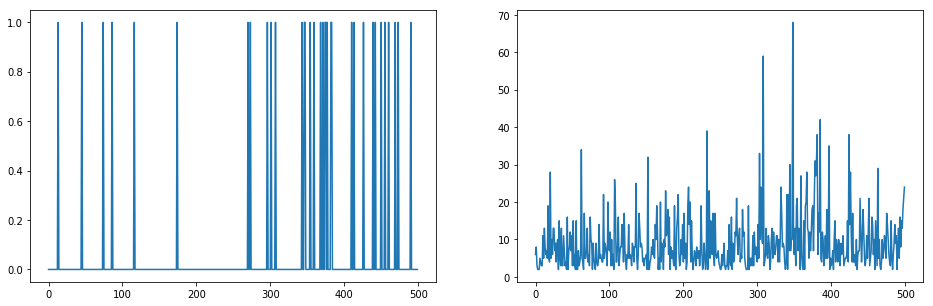

In [10]:
import matplotlib.pyplot as plt
print ("Score over time:"  +  str(sum(rList)/episodes))
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
plt.plot(rList)
plt.subplot(1,2,2)
plt.plot(jList)